# 3. Two-Stage CLUSTERING

This section implements the two stage clustering algorithm that was proposed in the report.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import sklearn.pipeline
from sklearn.cluster import KMeans
import numpy as np

## Load Dataset and select subset of macro variable to do the region clustering 

In [5]:
df = pd.read_csv('full_data_woe_rid_-2.csv').iloc[:, 2:]
micro = df.iloc[:, 8:61]
macro = df.iloc[:, 61:]

In [6]:
#clustering_df = micro[['number_of_employees_0', 'WoE_industry', 'WoE_country']]
#clustering_df = micro[['number_of_employees_0', 'WoE_industry']]
#clustering_df = micro[['WoE_industry', 'WoE_country']]
clustering_df= macro[['gdp_growth', 'inflation_growth', 'unemployment', 'hh_debt', 'corp_debt', 'govt_debt', '3m_yield', '10y_yield']]
df.columns

Index(['bvd_id_number', 'country_code', 'industry_code', 'size_class',
       'status_year', 'status_date_latest', 'status_latest',
       'default_indicator', 'intangible_fixed_assets_0',
       'intangible_fixed_assets_1', 'tangible_fixed_assets_0',
       'tangible_fixed_assets_1', 'other_fixed_assets_0',
       'other_fixed_assets_1', 'stock_0', 'stock_1', 'debtors_0', 'debtors_1',
       'other_current_assets_0', 'other_current_assets_1',
       'cash_cash_equivalent_0', 'cash_cash_equivalent_1', 'capital_0',
       'capital_1', 'other_shareholders_funds_0', 'other_shareholders_funds_1',
       'long_term_debt_0', 'long_term_debt_1',
       'other_noncurrent_liabilities_0', 'other_noncurrent_liabilities_1',
       'provisions_0', 'loans_0', 'loans_1', 'creditors_0', 'creditors_1',
       'other_current_liabilities_0', 'other_current_liabilities_1',
       'number_of_employees_0', 'number_of_employees_1', 'sales_0', 'sales_1',
       'operating_pl_ebit_0', 'operating_pl_ebit_1', 'f

# Step 1: Gaussian Mixture

In [15]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

transformer = sklearn.preprocessing.MinMaxScaler()
df_t = transformer.fit_transform(clustering_df)

n_clusters = 3
model = GaussianMixture(n_components=n_clusters, random_state= 42)
model.fit(df_t)

labels= model.predict(df_t)


#labels = results.labels_
#centroids = results.cluster_centers_

for i in range(n_clusters):
    cluster_data = micro[labels == i]
    print(f"Cluster {i+1}: {len(cluster_data)} points")

Cluster 1: 479595 points
Cluster 2: 323036 points
Cluster 3: 273295 points


In [13]:
n_clusters = np.arange(1, 10)
aics = []
bics = []

for n in n_clusters:
    gmm = GaussianMixture(n_components=n, random_state=0).fit(df_t)
    aics.append(gmm.aic(df_t))
    bics.append(gmm.bic(df_t))

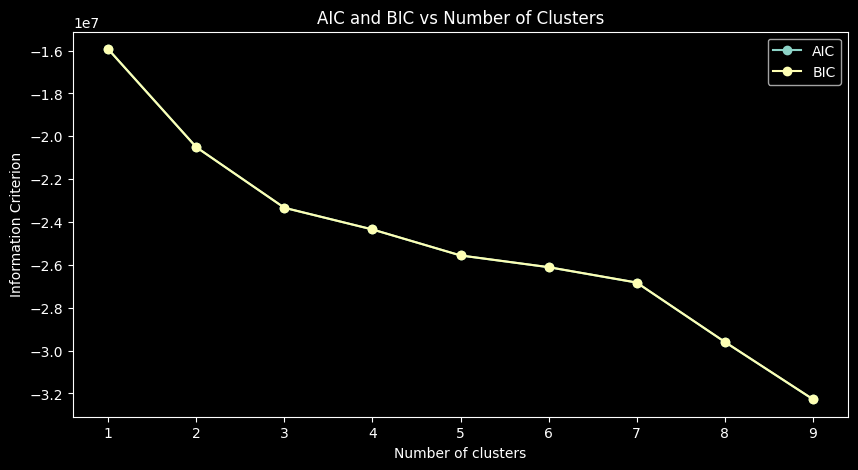

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(n_clusters, aics, label='AIC', marker='o')
plt.plot(n_clusters, bics, label='BIC', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Information Criterion')
plt.legend()
plt.title('AIC and BIC vs Number of Clusters')
plt.show()

In [16]:
sectors_total = df.iloc[:, :8]['industry_code'].value_counts().to_dict()
countries_total = df.iloc[:, :8]['country_code'].value_counts().to_dict()

In [17]:
for i in range(n_clusters):
    #sectors_cluster = pd.merge(micro[labels == i], df.iloc[:, :8], left_index=True, right_index=True, how = 'left')['industry_code'].value_counts().to_dict()
    countries_cluster = pd.merge(micro[labels == i], df.iloc[:, :8], left_index=True, right_index=True, how = 'left')['country_code'].value_counts().to_dict()

    #sectors_cluster_prop = {key: round(sectors_cluster[key] / sectors_total[key], 2) for key in sectors_cluster}
    countries_cluster_prop = {key: round(countries_cluster[key] / countries_total[key], 2) for key in countries_cluster}

    #sec = dict(sorted(sectors_cluster_prop.items(), key=lambda x: x[1], reverse=True))
    count = dict(sorted(countries_cluster_prop.items(), key=lambda x: x[1], reverse=True))

    print(f'Cluster {i+1}: \n Countries (percent): {count} \n')

Cluster 1: 
 Countries (percent): {'PT': 1.0, 'IT': 0.92, 'ES': 0.87} 

Cluster 2: 
 Countries (percent): {'PL': 1.0, 'CZ': 1.0, 'RO': 1.0, 'HU': 1.0, 'BG': 1.0, 'HR': 1.0, 'LT': 1.0, 'LV': 1.0, 'BE': 1.0, 'SK': 0.9, 'IS': 0.86, 'SI': 0.39, 'FI': 0.09, 'IT': 0.08, 'DE': 0.07, 'AT': 0.05, 'DK': 0.03, 'NO': 0.02, 'ES': 0.01, 'SE': 0.01, 'PT': 0.0} 

Cluster 3: 
 Countries (percent): {'NL': 1.0, 'SE': 0.99, 'NO': 0.98, 'DK': 0.97, 'AT': 0.95, 'DE': 0.93, 'FI': 0.91, 'SI': 0.61, 'IS': 0.14, 'ES': 0.12, 'SK': 0.1, 'PT': 0.0} 



# Step 3: K-Means

In [7]:
transformer = sklearn.preprocessing.MinMaxScaler()

n_clusters = 3
model = KMeans(n_clusters=n_clusters)

pipeline = sklearn.pipeline.Pipeline(
            [('transformet', transformer), ('model', model)])


pipeline.fit(clustering_df)
results = pipeline.steps[1][1]
labels = results.labels_
centroids = results.cluster_centers_

for i in range(n_clusters):
    cluster_data = macro[labels == i]
    print(f"Cluster {i+1}: {len(cluster_data)} points")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1: 564199 points
Cluster 2: 413106 points
Cluster 3: 98621 points


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

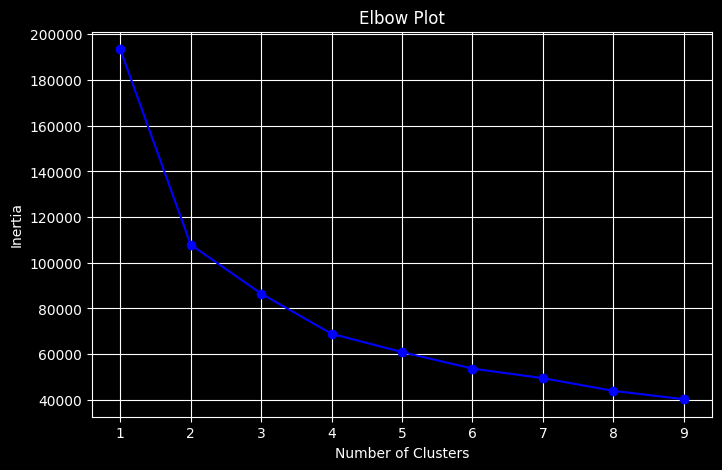

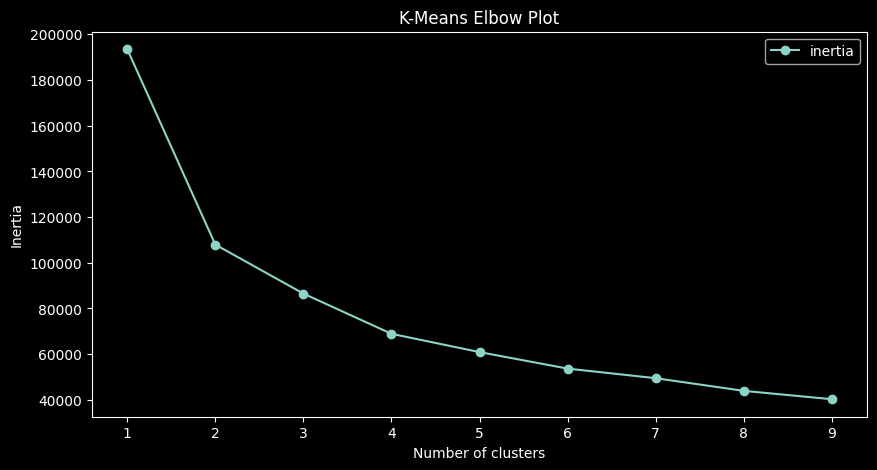

In [24]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 10):
    n_clusters = i
    model = KMeans(n_clusters=n_clusters)

    pipeline = sklearn.pipeline.Pipeline(
                [('transformet', transformer), ('model', model)])


    pipeline.fit(clustering_df)
    results = pipeline.steps[1][1]
    labels = results.labels_
    centroids = results.cluster_centers_
    wcss.append(results.inertia_)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 10))
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), wcss, label='inertia', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.legend()
plt.title('K-Means Elbow Plot')
plt.show()

Here, we can see that the interpretability of k-Means is much lower than the one of GMM. Hence on the region level we use the GMM clusters

In [19]:
for i in range(n_clusters):
    #sectors_cluster = pd.merge(micro[labels == i], df.iloc[:, :8], left_index=True, right_index=True, how = 'left')['industry_code'].value_counts().to_dict()
    countries_cluster = pd.merge(micro[labels == i], df.iloc[:, :8], left_index=True, right_index=True, how = 'left')['country_code'].value_counts().to_dict()

    #sectors_cluster_prop = {key: round(sectors_cluster[key] / sectors_total[key], 2) for key in sectors_cluster}
    countries_cluster_prop = {key: round(countries_cluster[key] / countries_total[key], 2) for key in countries_cluster}

    #sec = dict(sorted(sectors_cluster_prop.items(), key=lambda x: x[1], reverse=True))
    count = dict(sorted(countries_cluster_prop.items(), key=lambda x: x[1], reverse=True))

    print(f'Cluster {i+1}: \n Countries (percent): {count} \n')

Cluster 1: 
 Countries (percent): {'DE': 1.0, 'NO': 1.0, 'CZ': 1.0, 'RO': 1.0, 'HU': 1.0, 'SE': 1.0, 'FI': 1.0, 'AT': 1.0, 'SI': 1.0, 'NL': 1.0, 'DK': 1.0, 'PL': 0.99, 'SK': 0.99, 'BG': 0.99, 'LT': 0.99, 'LV': 0.98, 'IS': 0.91, 'HR': 0.79, 'ES': 0.13, 'BE': 0.13, 'PT': 0.0} 

Cluster 2: 
 Countries (percent): {'IT': 1.0, 'PT': 1.0, 'BE': 0.87, 'ES': 0.36, 'IS': 0.09} 

Cluster 3: 
 Countries (percent): {'ES': 0.5, 'HR': 0.21, 'LV': 0.02, 'PL': 0.01, 'SK': 0.01, 'BG': 0.01, 'LT': 0.01, 'PT': 0.0} 



# Step 4 (interpretability of GMM > k-Means): Clustering sectors

In [21]:
df['country_code'].unique()

array(['DE', 'IT', 'ES', 'NO', 'PL', 'HR', 'NL', 'CZ', 'PT', 'HU', 'FI',
       'RO', 'SE', 'BG', 'SK', 'SI', 'AT', 'IS', 'LT', 'BE', 'DK', 'LV'],
      dtype=object)

In [18]:
#Note, 2 strange cases of Gaussian CLUSTERING are Belgium in cluster 2 and Slovania in cluster 3

country1 = df[df['country_code'].isin(['IT', 'PT', 'ES'])]
country2 = df[df['country_code'].isin(['PL', 'CZ', 'RO','HU','BG','HR','LT','LV','BE','SK','IS'])]
country3 = df[df['country_code'].isin(['NL', 'SE', 'NO','DK','AT','DE','FI','SI'])]

In [19]:
micro1 = country1.iloc[:, 8:61]
micro2 = country2.iloc[:, 8:61]
micro3 = country3.iloc[:, 8:61]

In [20]:
clustering_df1= micro1[['number_of_employees_0', 'WoE_industry']]
clustering_df2= micro2[['number_of_employees_0', 'WoE_industry']]
clustering_df3= micro3[['number_of_employees_0', 'WoE_industry']]

# Country Cluster 1 (K-Means gives more interpretable)

In [32]:
transformer = sklearn.preprocessing.MinMaxScaler()

n_clusters = 3
model = KMeans(n_clusters=n_clusters)

pipeline = sklearn.pipeline.Pipeline(
            [('transformet', transformer), ('model', model)])


pipeline.fit(clustering_df1)
results = pipeline.steps[1][1]
labels = results.labels_
centroids = results.cluster_centers_

for i in range(n_clusters):
    cluster_data = country1[labels == i]
    print(f"Cluster {i+1}: {len(cluster_data)} points")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1: 364383 points
Cluster 2: 45983 points
Cluster 3: 117536 points


In [81]:
sectors_total = country1.iloc[:, :8]['industry_code'].value_counts().to_dict()
countries_total = country1.iloc[:, :8]['country_code'].value_counts().to_dict()

K=3

Sector 1: Wholesale and Retail Trade, Manufacturing, Professional Services, Information and Communication, Gdf?, Arts& Entertainment, Finance

Sector 2: Agriculture, Energy, Utilities, Defense activities, Mining, Accommodation and Food Services, Human Health and Social Work 

Sector 3: Construction, Transportation, Technical Services, Real Estate


In [88]:
for i in range(n_clusters):
    sectors_cluster = pd.merge(micro1[labels == i], df.iloc[:, :8], left_index=True, right_index=True, how = 'left')['industry_code'].value_counts().to_dict()
    #numb_of_emp = pd.merge(micro1[labels == i], df.iloc[:, :8], left_index=True, right_index=True, how = 'left')['number_of_employees_0'].value_counts().to_dict()
    #countries_cluster = pd.merge(countr[labels == i], df.iloc[:, :8], left_index=True, right_index=True, how = 'left')['country_code'].value_counts().to_dict()

    sectors_cluster_prop = {key: round(sectors_cluster[key] / sectors_total[key], 2) for key in sectors_cluster}
    #employee_mean = {key: round(sectors_cluster[key] / sectors_total[key], 2) for key in sectors_cluster}
    #countries_cluster_prop = {key: round(countries_cluster[key] / countries_total[key], 2) for key in countries_cluster}
    
    
    sec = dict(sorted(sectors_cluster_prop.items(), key=lambda x: x[1], reverse=True))
    #count = dict(sorted(countries_cluster_prop.items(), key=lambda x: x[1], reverse=True))
    mean = round(micro1['number_of_employees_0'][labels==i].mean(),2)
    
    print(f'Cluster {i+1}: \n Sector (percent): {sec} \n Number of employees: {mean} \n')
    #print(micro1['number_of_employees_0'][labels==i].mean())

Cluster 1: 
 Sector (percent): {'G': 1.0, 'C': 1.0, 'M': 1.0, 'J': 1.0, 'GX': 1.0, 'R': 1.0, 'S': 1.0, 'K': 1.0} 
 Number of employees: 29.74 

Cluster 2: 
 Sector (percent): {'I': 1.0, 'Q': 1.0, 'A': 1.0, 'E': 1.0, 'D': 1.0, 'P': 1.0, 'B': 1.0} 
 Number of employees: 62.54 

Cluster 3: 
 Sector (percent): {'F': 1.0, 'H': 1.0, 'N': 1.0, 'L': 1.0} 
 Number of employees: 41.63 



In [89]:
from sklearn.mixture import GaussianMixture
transformer = sklearn.preprocessing.MinMaxScaler()
X= transformer.fit_transform(clustering_df1)

n_clusters = 3
model = GaussianMixture(n_components=n_clusters, random_state= 42)
model.fit(X)

labels= model.predict(X)

#labels = results.labels_
#centroids = results.cluster_centers_

for i in range(n_clusters):
    cluster_data = country1[labels == i]
    print(f"Cluster {i+1}: {len(cluster_data)} points")

Cluster 1: 349424 points
Cluster 2: 61147 points
Cluster 3: 117331 points


In [90]:
for i in range(n_clusters):
    sectors_cluster = pd.merge(micro1[labels == i], df.iloc[:, :8], left_index=True, right_index=True, how = 'left')['industry_code'].value_counts().to_dict()
    #countries_cluster = pd.merge(countr[labels == i], df.iloc[:, :8], left_index=True, right_index=True, how = 'left')['country_code'].value_counts().to_dict()

    sectors_cluster_prop = {key: round(sectors_cluster[key] / sectors_total[key], 2) for key in sectors_cluster}
    #countries_cluster_prop = {key: round(countries_cluster[key] / countries_total[key], 2) for key in countries_cluster}

    sec = dict(sorted(sectors_cluster_prop.items(), key=lambda x: x[1], reverse=True))
    #count = dict(sorted(countries_cluster_prop.items(), key=lambda x: x[1], reverse=True))

    print(f'Cluster {i+1}: \n Sector (percent): {sec} \n')

Cluster 1: 
 Sector (percent): {'G': 1.0, 'C': 1.0, 'GX': 1.0, 'R': 1.0, 'M': 0.99, 'S': 0.98} 

Cluster 2: 
 Sector (percent): {'J': 1.0, 'I': 1.0, 'Q': 1.0, 'A': 1.0, 'E': 1.0, 'D': 1.0, 'P': 1.0, 'B': 1.0, 'K': 1.0, 'S': 0.02, 'M': 0.01, 'N': 0.01, 'L': 0.0, 'F': 0.0, 'G': 0.0, 'C': 0.0, 'R': 0.0, 'H': 0.0, 'GX': 0.0} 

Cluster 3: 
 Sector (percent): {'F': 1.0, 'H': 1.0, 'L': 1.0, 'N': 0.99} 



# Country cluster 2

K-Means (K=4)

Cluster 1: Construction, Transportation and Storage, Real estate, Technical Support

Cluster 2: Professional services, Information and Communication, Utilities, Energy, Entertainment, Finance

Cluster 3: Agriculture, Social Work Activities, Accomodation and Food, Mining, Defense

Cluster 4: Wholesale and Retail Trade, Manufacturing, GX?, Entertainment

In [95]:
transformer = sklearn.preprocessing.MinMaxScaler()

n_clusters = 4
model = KMeans(n_clusters=n_clusters)

pipeline = sklearn.pipeline.Pipeline(
            [('transformet', transformer), ('model', model)])


pipeline.fit(clustering_df2)
results = pipeline.steps[1][1]
labels = results.labels_
centroids = results.cluster_centers_

for i in range(n_clusters):
    cluster_data = country2[labels == i]
    print(f"Cluster {i+1}: {len(cluster_data)} points")

Cluster 1: 67271 points
Cluster 2: 32338 points
Cluster 3: 22796 points
Cluster 4: 161367 points


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

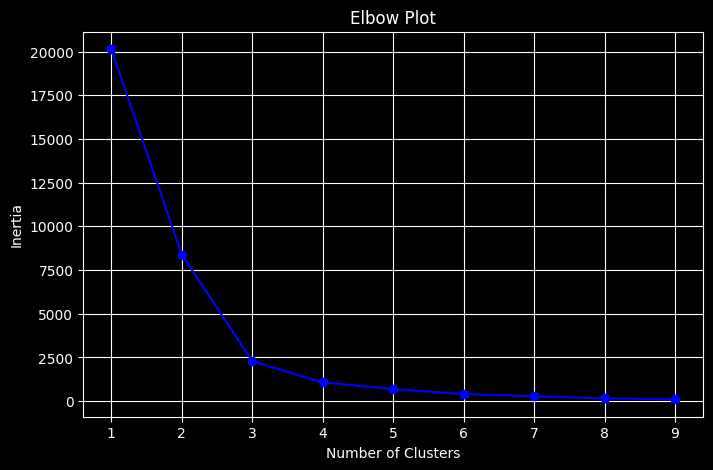

In [23]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 10):
    n_clusters = i
    model = KMeans(n_clusters=n_clusters)

    pipeline = sklearn.pipeline.Pipeline(
                [('transformet', transformer), ('model', model)])


    pipeline.fit(clustering_df1)
    results = pipeline.steps[1][1]
    labels = results.labels_
    centroids = results.cluster_centers_
    wcss.append(results.inertia_)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 10))
plt.grid(True)
plt.show()

In [96]:
sectors_total = country2.iloc[:, :8]['industry_code'].value_counts().to_dict()
countries_total = country2.iloc[:, :8]['country_code'].value_counts().to_dict()

In [97]:
for i in range(n_clusters):
    sectors_cluster = pd.merge(micro2[labels == i], df.iloc[:, :8], left_index=True, right_index=True, how = 'left')['industry_code'].value_counts().to_dict()
    #numb_of_emp = pd.merge(micro1[labels == i], df.iloc[:, :8], left_index=True, right_index=True, how = 'left')['number_of_employees_0'].value_counts().to_dict()
    #countries_cluster = pd.merge(countr[labels == i], df.iloc[:, :8], left_index=True, right_index=True, how = 'left')['country_code'].value_counts().to_dict()

    sectors_cluster_prop = {key: round(sectors_cluster[key] / sectors_total[key], 2) for key in sectors_cluster}
    #employee_mean = {key: round(sectors_cluster[key] / sectors_total[key], 2) for key in sectors_cluster}
    #countries_cluster_prop = {key: round(countries_cluster[key] / countries_total[key], 2) for key in countries_cluster}
    
    
    sec = dict(sorted(sectors_cluster_prop.items(), key=lambda x: x[1], reverse=True))
    #count = dict(sorted(countries_cluster_prop.items(), key=lambda x: x[1], reverse=True))
    mean = round(micro2['number_of_employees_0'][labels==i].mean(),2)
    
    print(f'Cluster {i+1}: \n Sector (percent): {sec} \n Number of employees: {mean} \n')
    #print(micro1['number_of_employees_0'][labels==i].mean())

Cluster 1: 
 Sector (percent): {'F': 1.0, 'H': 1.0, 'L': 1.0, 'N': 1.0} 
 Number of employees: 74.83 

Cluster 2: 
 Sector (percent): {'M': 1.0, 'J': 1.0, 'E': 1.0, 'D': 1.0, 'S': 1.0, 'K': 1.0} 
 Number of employees: 76.89 

Cluster 3: 
 Sector (percent): {'A': 1.0, 'Q': 1.0, 'I': 1.0, 'B': 1.0, 'P': 1.0} 
 Number of employees: 113.07 

Cluster 4: 
 Sector (percent): {'G': 1.0, 'C': 1.0, 'GX': 1.0, 'R': 1.0} 
 Number of employees: 56.54 



# Country cluster 3

Very similar to cluster 1, copy pasted below; might be slightly different

K=3

Sector 1: Wholesale and Retail Trade, Manufacturing, Professional Services, Information and Communication, GX?, Arts& Entertainment, Finance

Sector 2: Agriculture, Energy, Utilities, Defense activities, Mining, Accommodation and Food Services, Human Health and Social Work 

Sector 3: Construction, Transportation, Technical Services, Real Estate

In [99]:
transformer = sklearn.preprocessing.MinMaxScaler()

n_clusters = 3
model = KMeans(n_clusters=n_clusters)

pipeline = sklearn.pipeline.Pipeline(
            [('transformet', transformer), ('model', model)])


pipeline.fit(clustering_df3)
results = pipeline.steps[1][1]
labels = results.labels_
centroids = results.cluster_centers_

for i in range(n_clusters):
    cluster_data = country3[labels == i]
    print(f"Cluster {i+1}: {len(cluster_data)} points")

Cluster 1: 155667 points
Cluster 2: 26329 points
Cluster 3: 82256 points


In [100]:
sectors_total = country3.iloc[:, :8]['industry_code'].value_counts().to_dict()
countries_total = country3.iloc[:, :8]['country_code'].value_counts().to_dict()

In [101]:
for i in range(n_clusters):
    sectors_cluster = pd.merge(micro3[labels == i], df.iloc[:, :8], left_index=True, right_index=True, how = 'left')['industry_code'].value_counts().to_dict()
    #numb_of_emp = pd.merge(micro1[labels == i], df.iloc[:, :8], left_index=True, right_index=True, how = 'left')['number_of_employees_0'].value_counts().to_dict()
    #countries_cluster = pd.merge(countr[labels == i], df.iloc[:, :8], left_index=True, right_index=True, how = 'left')['country_code'].value_counts().to_dict()

    sectors_cluster_prop = {key: round(sectors_cluster[key] / sectors_total[key], 2) for key in sectors_cluster}
    #employee_mean = {key: round(sectors_cluster[key] / sectors_total[key], 2) for key in sectors_cluster}
    #countries_cluster_prop = {key: round(countries_cluster[key] / countries_total[key], 2) for key in countries_cluster}
    
    
    sec = dict(sorted(sectors_cluster_prop.items(), key=lambda x: x[1], reverse=True))
    #count = dict(sorted(countries_cluster_prop.items(), key=lambda x: x[1], reverse=True))
    mean = round(micro3['number_of_employees_0'][labels==i].mean(),2)
    
    print(f'Cluster {i+1}: \n Sector (percent): {sec} \n Number of employees: {mean} \n')
    #print(micro1['number_of_employees_0'][labels==i].mean())

Cluster 1: 
 Sector (percent): {'G': 1.0, 'C': 1.0, 'M': 1.0, 'J': 1.0, 'K': 1.0, 'GX': 1.0, 'S': 1.0, 'R': 1.0} 
 Number of employees: 38.93 

Cluster 2: 
 Sector (percent): {'Q': 1.0, 'I': 1.0, 'E': 1.0, 'D': 1.0, 'A': 1.0, 'P': 1.0, 'B': 1.0} 
 Number of employees: 66.76 

Cluster 3: 
 Sector (percent): {'F': 1.0, 'L': 1.0, 'H': 1.0, 'N': 1.0} 
 Number of employees: 44.38 



# Final Cluster Data

In [7]:
Cluster1 = country1[country1['industry_code'].isin(['G', 'C', 'M','J','GX','R','S','K'])]
Cluster2 = country1[country1['industry_code'].isin(['I', 'Q', 'A','E','D','P','B'])]
Cluster3 = country1[country1['industry_code'].isin(['F', 'H', 'N','L'])]

Cluster4 = country2[country2['industry_code'].isin(['F', 'H', 'N', 'L'])]
Cluster5 = country2[country2['industry_code'].isin(['M', 'J', 'E','D','S','K'])]
Cluster6 = country2[country2['industry_code'].isin(['A', 'Q', 'I','B','P'])]
Cluster7 = country2[country2['industry_code'].isin(['G', 'C', 'GX','R'])]

Cluster8 = country3[country3['industry_code'].isin(['G', 'C', 'M','J','GX','R','S','K'])]
Cluster9 = country3[country3['industry_code'].isin(['I', 'Q', 'A','E','D','P','B'])]
Cluster10 = country3[country3['industry_code'].isin(['F', 'H', 'N','L'])]

In [8]:
print(Cluster1.shape[0])
print(Cluster2.shape[0])
print(Cluster3.shape[0])
print(Cluster4.shape[0])
print(Cluster5.shape[0])
print(Cluster6.shape[0])
print(Cluster7.shape[0])
print(Cluster8.shape[0])
print(Cluster9.shape[0])
print(Cluster10.shape[0])

364383
45983
117536
67271
32338
22796
161367
155667
26329
82256


# Overview of final clusters:

# Cluster 1: 

Countries: Southern Europe

Sectors: Wholesale and Retail Trade, Manufacturing, Professional Services, Information and Communication, GX?, Arts& Entertainment, Finance

# Cluster 2:

Countries: Southern Europe

Sectors: Agriculture, Energy, Utilities, Defense activities, Mining, Accommodation and Food Services, Human Health and Social Work

# Cluster 3

Countries: Southern Europe

Sectors: Construction, Transportation, Technical Services, Real Estate


# Cluster 4: 

Countries: Eastern Europe

Sectors: Construction, Transportation and Storage, Real estate, Technical Support

# Cluster 5:

Countries: Eastern Europe

Sectors: Professional services, Information and Communication, Utilities, Energy, Entertainment, Finance

# Cluster 6:

Countries: Eastern Europe

Sectors: Agriculture, Social Work Activities, Accomodation and Food, Mining, Defense


# Cluster 7:

Countries: Eastern Europe

Sectors: Wholesale and Retail Trade, Manufacturing, GX?, Entertainment


# Cluster 8:

Countries: Northern Europe

Sectors: Wholesale and Retail Trade, Manufacturing, Professional Services, Information and Communication, GX?, Arts& Entertainment, Finance

# Cluster 9:

Countries: Northern Europe

Sectors: Agriculture, Energy, Utilities, Defense activities, Mining, Accommodation and Food Services, Human Health and Social Work 


# Cluster 10:

Countries: Northern Europe

Sectors: Construction, Transportation, Technical Services, Real Estate


In [160]:
#Cluster9['default_indicator'].sum()/Cluster9.shape[0]

print(Cluster1['default_indicator'].sum()/Cluster1.shape[0])
print(Cluster2['default_indicator'].sum()/Cluster2.shape[0])
print(Cluster3['default_indicator'].sum()/Cluster3.shape[0])

print(Cluster4['default_indicator'].sum()/Cluster4.shape[0])
print(Cluster5['default_indicator'].sum()/Cluster5.shape[0])
print(Cluster6['default_indicator'].sum()/Cluster6.shape[0])
print(Cluster7['default_indicator'].sum()/Cluster7.shape[0])

print(Cluster8['default_indicator'].sum()/Cluster8.shape[0])
print(Cluster9['default_indicator'].sum()/Cluster9.shape[0])
print(Cluster10['default_indicator'].sum()/Cluster10.shape[0])

## Observations
## Southern Europe most defaults, followed by Eastern Europe and finally Northern Europe
## Southern Europe: Cluster 1 (services and essential products) performs best
## Eastern Europe: Cluster 4 (building/housing performs best)
## Northern Europe: Cluster 10 (building/housing performs best)

0.006550799570781293
0.013765956984102821
0.010915804519466376
0.004905531358237576
0.00550436019543571
0.006667836462537287
0.004746943303153681
0.003854381468133901
0.0040639598921341485
0.0037079361991830383


In [164]:
TotalDefaults= df['default_indicator'].sum() 

# Share of defaults
print(Cluster1['default_indicator'].sum()/TotalDefaults)
print(Cluster2['default_indicator'].sum()/TotalDefaults)
print(Cluster3['default_indicator'].sum()/TotalDefaults)

print(Cluster4['default_indicator'].sum()/TotalDefaults)
print(Cluster5['default_indicator'].sum()/TotalDefaults)
print(Cluster6['default_indicator'].sum()/TotalDefaults)
print(Cluster7['default_indicator'].sum()/TotalDefaults)

print(Cluster8['default_indicator'].sum()/TotalDefaults)
print(Cluster9['default_indicator'].sum()/TotalDefaults)
print(Cluster10['default_indicator'].sum()/TotalDefaults)

## Roughly 65% of defaults comes from Southern Europe, whilst it represents only 49% of the data

0.3541017653167186
0.09390298175344905
0.190327844533452
0.04895416110369381
0.026405577807446966
0.022548583296246847
0.11363299213766503
0.08900756564307966
0.015873015873015872
0.04524551253523216


In [167]:
## Cluster 2 and 3 are the most fucked up ones, almost 2x as much defaults as share in data
## Southern Europe Large Infrastructure Projects and Buildings

# Share in data
print(Cluster1.shape[0]/df.shape[0])
print(Cluster2.shape[0]/df.shape[0])
print(Cluster3.shape[0]/df.shape[0])
print(Cluster4.shape[0]/df.shape[0])
print(Cluster5.shape[0]/df.shape[0])
print(Cluster6.shape[0]/df.shape[0])
print(Cluster7.shape[0]/df.shape[0])
print(Cluster8.shape[0]/df.shape[0])
print(Cluster9.shape[0]/df.shape[0])
print(Cluster10.shape[0]/df.shape[0])

0.3386692021570257
0.04273806934677664
0.10924171364945173
0.06252381669371314
0.030055970392015807
0.021187330727206147
0.1499796454402998
0.1446818833265485
0.02447101380578218
0.07645135446118041
